In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


2022-03-12 09:19:38.508618: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-12 09:19:38.508655: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
generator = keras.models.load_model('datas/gen-imgnet.h5')

2022-03-12 09:19:40.842829: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-12 09:19:40.842868: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-12 09:19:40.842892: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Inspiron-5558): /proc/driver/nvidia/version does not exist
2022-03-12 09:19:40.843137: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
generator.compile()

In [5]:
def plot_examples(images_at_scales):
    n_examples = images_at_scales[0].shape[0]
    fig, axes = plt.subplots(figsize=(5, n_examples), nrows=n_examples, ncols=5, dpi=200)
    for i in range(n_examples):
        for j in range(5):
            generated_images = images_at_scales[4-j]
            gen_1 = generated_images[i].numpy()*127.5+127.5
            axes[i, j].axis('off')
            axes[i, j].imshow((gen_1).astype("uint32"), interpolation='none')
    plt.show()

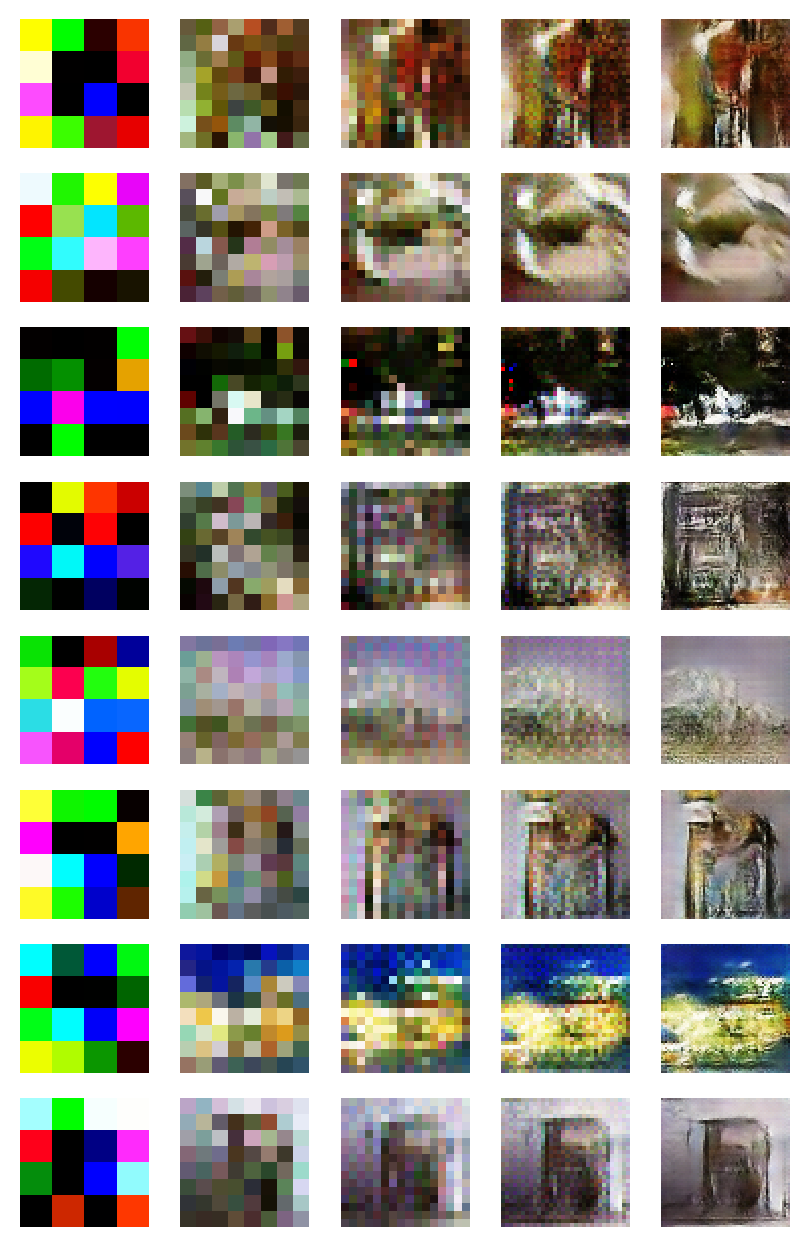

In [6]:
latent_dim = 100

noises = tf.random.normal([8, latent_dim])
example_images = generator(noises, training=False)

plot_examples(example_images)

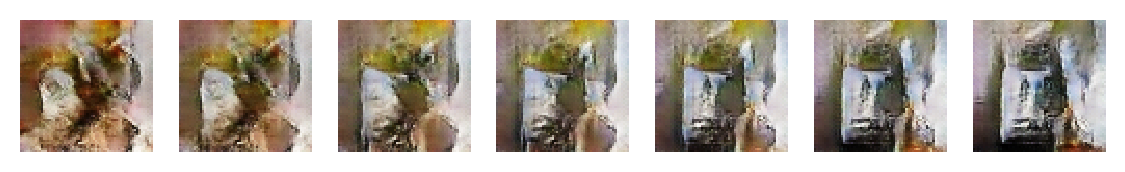

In [6]:
from scipy.interpolate import interp1d
import numpy as np


noises = tf.random.normal([2, latent_dim])

res = []

step_size = 8
for i in range(1, len(noises)):
    linfit = interp1d([1, step_size], np.vstack([noises[i-1], noises[i]]), axis=0)
    
    for j in range(1,step_size):
        generated_image = generator(linfit(j).reshape(1,latent_dim), training=False)
        res.append(generated_image)
        
fig, axes = plt.subplots(figsize=(len(res), 1), nrows=1, ncols=len(res), dpi=200)

for i in range(len(res)):
    gen_1 = res[i][0][0].numpy()*127.5+127.5
    axes[i].axis('off')
    axes[i].imshow((gen_1).astype("uint32"), interpolation='none')
plt.show()

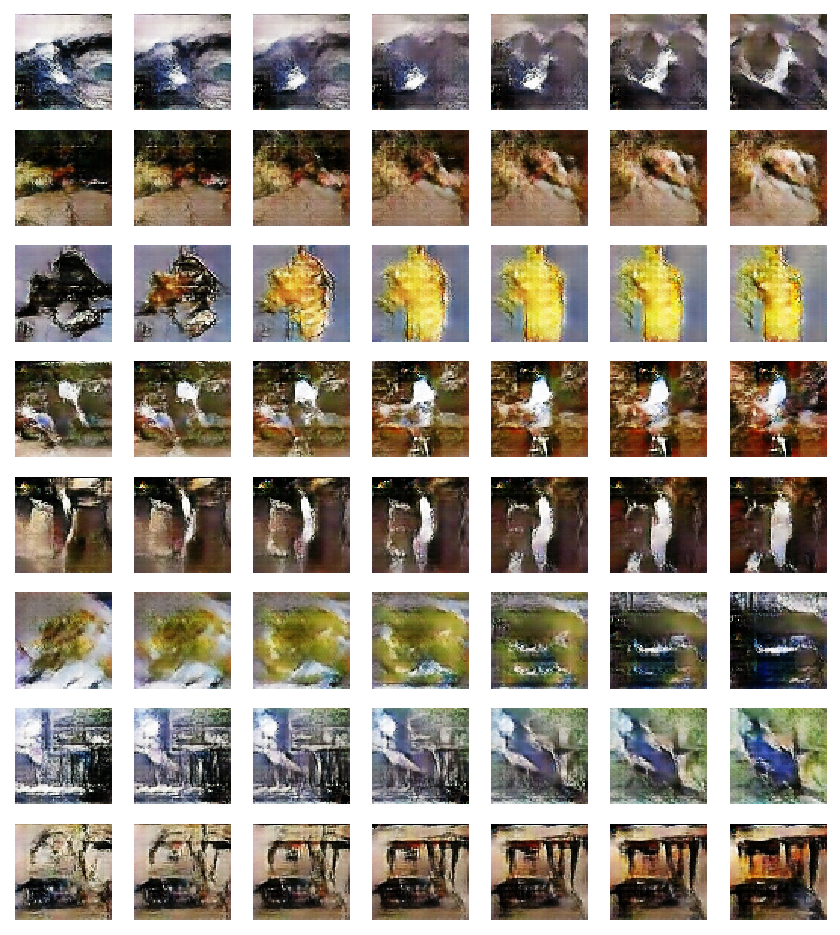

In [7]:
from scipy.interpolate import interp1d
import numpy as np

rows = 8
step_size = 8
fig, axes = plt.subplots(figsize=(step_size-1, rows), nrows=rows, ncols=step_size-1, dpi=150)

for k in range(rows):
    noises = tf.random.normal([2, latent_dim])
    res = []
    step_size = 8
    for i in range(1, len(noises)):
        linfit = interp1d([1, step_size], np.vstack([noises[i-1], noises[i]]), axis=0)
        for j in range(1,step_size):
            generated_image = generator(linfit(j).reshape(1,latent_dim), training=False)
            res.append(generated_image)
    for i in range(step_size-1):
        gen_1 = res[i][0][0].numpy()*127.5+127.5
        axes[k][i].axis('off')
        axes[k][i].imshow((gen_1).astype("uint32"), interpolation='none')
plt.show()